In \[5\]:

    import os
    import zipfile
    import numpy as np
    import matplotlib.pyplot as plt
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
    from sklearn.model_selection import StratifiedKFold
    from tensorflow.keras.callbacks import EarlyStopping

In \[12\]:

    zip_file_path = '/content/dogvscat1000.zip'
    unzip_dir = '/content/dog_vs_cat_final/'

    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(unzip_dir)

    data_dir = os.path.join(unzip_dir)

In \[13\]:

    data_dir = os.path.join("/content/dog_vs_cat_final/dogvscat1000/")

    img_width, img_height = 150, 150

In \[14\]:

    datagen = ImageDataGenerator(rescale=1./255)

    train_generator = datagen.flow_from_directory(
        data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary',
        shuffle=True
    )

    Found 1000 images belonging to 2 classes.

In \[15\]:

    def create_model():
        model = Sequential()
        model.add(Flatten(input_shape=(img_width, img_height, 3)))
        model.add(Dense(128, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

In \[17\]:

    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    acc_per_fold = []
    loss_per_fold = []
    epochs = 20

    all_images = []
    all_labels = []

    for batch in range(len(train_generator)):
        images, labels = train_generator[batch]
        all_images.extend(images)
        all_labels.extend(labels)

    all_images = np.array(all_images)
    all_labels = np.array(all_labels)

    for train, test in kfold.split(all_images, all_labels):
        model = create_model()
        early_stopping = EarlyStopping(monitor='loss', patience=3)

        train_datagen = ImageDataGenerator(rescale=1./255)
        test_datagen = ImageDataGenerator(rescale=1./255)

        train_generator_fold = train_datagen.flow(all_images[train], all_labels[train], batch_size=32)
        test_generator_fold = test_datagen.flow(all_images[test], all_labels[test], batch_size=32)

        history = model.fit(train_generator_fold,
                            validation_data=test_generator_fold,
                            epochs=epochs,
                            callbacks=[early_stopping],
                            verbose=1)

        scores = model.evaluate(test_generator_fold, verbose=0)
        acc_per_fold.append(scores[1] * 100)
        loss_per_fold.append(scores[0])

    print(f'Accuracy per fold: {acc_per_fold}')
    print(f'Mean accuracy: {np.mean(acc_per_fold)} ± {np.std(acc_per_fold)}')
    print(f'Loss per fold: {loss_per_fold}')

    /usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
      super().__init__(**kwargs)

    Epoch 1/20

    /usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
      self._warn_if_super_not_called()

    29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 195ms/step - accuracy: 0.5205 - loss: 0.7811 - val_accuracy: 0.5000 - val_loss: 0.7004
    Epoch 2/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 178ms/step - accuracy: 0.5923 - loss: 0.6876 - val_accuracy: 0.5700 - val_loss: 0.6892
    Epoch 3/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 185ms/step - accuracy: 0.6557 - loss: 0.6494 - val_accuracy: 0.5300 - val_loss: 0.6880
    Epoch 4/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 0.6497 - loss: 0.5988 - val_accuracy: 0.5100 - val_loss: 0.6874
    Epoch 5/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - accuracy: 0.7777 - loss: 0.5213 - val_accuracy: 0.5100 - val_loss: 0.6861
    Epoch 6/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 195ms/step - accuracy: 0.7291 - loss: 0.5382 - val_accuracy: 0.5800 - val_loss: 0.6838
    Epoch 7/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/step - accuracy: 0.7556 - loss: 0.5115 - val_accuracy: 0.5100 - val_loss: 0.6907
    Epoch 8/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 201ms/step - accuracy: 0.7812 - loss: 0.4763 - val_accuracy: 0.5900 - val_loss: 0.6663
    Epoch 9/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 355ms/step - accuracy: 0.7710 - loss: 0.4781 - val_accuracy: 0.5600 - val_loss: 0.6839
    Epoch 10/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 201ms/step - accuracy: 0.8040 - loss: 0.4390 - val_accuracy: 0.5200 - val_loss: 0.7117
    Epoch 11/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 239ms/step - accuracy: 0.8405 - loss: 0.3911 - val_accuracy: 0.5000 - val_loss: 0.7549
    Epoch 12/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 188ms/step - accuracy: 0.8277 - loss: 0.4199 - val_accuracy: 0.5000 - val_loss: 0.8763
    Epoch 13/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 206ms/step - accuracy: 0.8674 - loss: 0.3809 - val_accuracy: 0.5500 - val_loss: 0.7263
    Epoch 14/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 163ms/step - accuracy: 0.8741 - loss: 0.3293 - val_accuracy: 0.5300 - val_loss: 0.7983
    Epoch 15/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 282ms/step - accuracy: 0.8696 - loss: 0.3288 - val_accuracy: 0.6300 - val_loss: 0.6845
    Epoch 16/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 179ms/step - accuracy: 0.8926 - loss: 0.3081 - val_accuracy: 0.6400 - val_loss: 0.6534
    Epoch 17/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 284ms/step - accuracy: 0.9014 - loss: 0.2929 - val_accuracy: 0.5100 - val_loss: 1.1885
    Epoch 18/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 243ms/step - accuracy: 0.9241 - loss: 0.2468 - val_accuracy: 0.5300 - val_loss: 0.8357
    Epoch 19/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 242ms/step - accuracy: 0.9454 - loss: 0.2029 - val_accuracy: 0.5000 - val_loss: 1.6573
    Epoch 20/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 227ms/step - accuracy: 0.9579 - loss: 0.1714 - val_accuracy: 0.6400 - val_loss: 0.8108
    Epoch 1/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 176ms/step - accuracy: 0.4579 - loss: 0.7507 - val_accuracy: 0.4800 - val_loss: 0.7022
    Epoch 2/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 170ms/step - accuracy: 0.5720 - loss: 0.6769 - val_accuracy: 0.4700 - val_loss: 0.6953
    Epoch 3/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 230ms/step - accuracy: 0.6662 - loss: 0.6101 - val_accuracy: 0.5500 - val_loss: 0.6901
    Epoch 4/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - accuracy: 0.7253 - loss: 0.5726 - val_accuracy: 0.5300 - val_loss: 0.6857
    Epoch 5/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 178ms/step - accuracy: 0.6796 - loss: 0.5935 - val_accuracy: 0.5700 - val_loss: 0.6777
    Epoch 6/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 0.7430 - loss: 0.5562 - val_accuracy: 0.5700 - val_loss: 0.6765
    Epoch 7/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 215ms/step - accuracy: 0.7623 - loss: 0.5196 - val_accuracy: 0.6000 - val_loss: 0.6734
    Epoch 8/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - accuracy: 0.8053 - loss: 0.4674 - val_accuracy: 0.5500 - val_loss: 0.6939
    Epoch 9/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - accuracy: 0.8500 - loss: 0.3942 - val_accuracy: 0.5300 - val_loss: 0.7028
    Epoch 10/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 225ms/step - accuracy: 0.8334 - loss: 0.3966 - val_accuracy: 0.5800 - val_loss: 0.6725
    Epoch 11/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - accuracy: 0.8782 - loss: 0.3463 - val_accuracy: 0.5300 - val_loss: 0.7250
    Epoch 12/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - accuracy: 0.8824 - loss: 0.3332 - val_accuracy: 0.6000 - val_loss: 0.6501
    Epoch 13/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step - accuracy: 0.9027 - loss: 0.2729 - val_accuracy: 0.6600 - val_loss: 0.6359
    Epoch 14/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 147ms/step - accuracy: 0.8707 - loss: 0.3429 - val_accuracy: 0.6400 - val_loss: 0.6715
    Epoch 15/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 169ms/step - accuracy: 0.8765 - loss: 0.3272 - val_accuracy: 0.5700 - val_loss: 0.6747
    Epoch 16/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step - accuracy: 0.8856 - loss: 0.3162 - val_accuracy: 0.5300 - val_loss: 0.8528
    Epoch 1/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 154ms/step - accuracy: 0.5138 - loss: 0.7705 - val_accuracy: 0.5000 - val_loss: 0.6934
    Epoch 2/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 210ms/step - accuracy: 0.6024 - loss: 0.6891 - val_accuracy: 0.5200 - val_loss: 0.6912
    Epoch 3/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step - accuracy: 0.6340 - loss: 0.6261 - val_accuracy: 0.5300 - val_loss: 0.6865
    Epoch 4/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step - accuracy: 0.6952 - loss: 0.5980 - val_accuracy: 0.5600 - val_loss: 0.6862
    Epoch 5/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 194ms/step - accuracy: 0.7251 - loss: 0.5395 - val_accuracy: 0.5900 - val_loss: 0.6831
    Epoch 6/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 147ms/step - accuracy: 0.7687 - loss: 0.5097 - val_accuracy: 0.5900 - val_loss: 0.6772
    Epoch 7/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 169ms/step - accuracy: 0.7834 - loss: 0.4903 - val_accuracy: 0.5800 - val_loss: 0.6829
    Epoch 8/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 179ms/step - accuracy: 0.7784 - loss: 0.4698 - val_accuracy: 0.5200 - val_loss: 0.7309
    Epoch 9/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 181ms/step - accuracy: 0.8515 - loss: 0.3887 - val_accuracy: 0.5500 - val_loss: 0.7078
    Epoch 10/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 163ms/step - accuracy: 0.8041 - loss: 0.3937 - val_accuracy: 0.6000 - val_loss: 0.6763
    Epoch 11/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - accuracy: 0.8688 - loss: 0.3484 - val_accuracy: 0.5800 - val_loss: 0.7006
    Epoch 12/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 195ms/step - accuracy: 0.8802 - loss: 0.3210 - val_accuracy: 0.5600 - val_loss: 0.7129
    Epoch 13/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - accuracy: 0.8881 - loss: 0.2914 - val_accuracy: 0.5300 - val_loss: 0.9863
    Epoch 14/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 202ms/step - accuracy: 0.8547 - loss: 0.3362 - val_accuracy: 0.5000 - val_loss: 0.9077
    Epoch 15/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 147ms/step - accuracy: 0.8999 - loss: 0.2647 - val_accuracy: 0.5500 - val_loss: 0.7918
    Epoch 16/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - accuracy: 0.8893 - loss: 0.2595 - val_accuracy: 0.5400 - val_loss: 0.8187
    Epoch 17/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 207ms/step - accuracy: 0.9214 - loss: 0.2135 - val_accuracy: 0.5700 - val_loss: 0.9427
    Epoch 18/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 154ms/step - accuracy: 0.8803 - loss: 0.2655 - val_accuracy: 0.5000 - val_loss: 1.1787
    Epoch 19/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 208ms/step - accuracy: 0.9236 - loss: 0.2153 - val_accuracy: 0.5600 - val_loss: 1.1588
    Epoch 20/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - accuracy: 0.9071 - loss: 0.2291 - val_accuracy: 0.4700 - val_loss: 1.2605
    Epoch 1/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 189ms/step - accuracy: 0.5071 - loss: 0.7622 - val_accuracy: 0.5300 - val_loss: 0.6907
    Epoch 2/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 183ms/step - accuracy: 0.6451 - loss: 0.6533 - val_accuracy: 0.4900 - val_loss: 0.6925
    Epoch 3/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 153ms/step - accuracy: 0.6416 - loss: 0.6196 - val_accuracy: 0.5700 - val_loss: 0.6897
    Epoch 4/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 214ms/step - accuracy: 0.7164 - loss: 0.5611 - val_accuracy: 0.5300 - val_loss: 0.6894
    Epoch 5/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 149ms/step - accuracy: 0.7176 - loss: 0.5482 - val_accuracy: 0.5200 - val_loss: 0.6889
    Epoch 6/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 230ms/step - accuracy: 0.7643 - loss: 0.5090 - val_accuracy: 0.5900 - val_loss: 0.6960
    Epoch 7/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - accuracy: 0.7825 - loss: 0.4810 - val_accuracy: 0.5500 - val_loss: 0.6911
    Epoch 8/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 198ms/step - accuracy: 0.7980 - loss: 0.4341 - val_accuracy: 0.4700 - val_loss: 0.7024
    Epoch 9/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step - accuracy: 0.7912 - loss: 0.4568 - val_accuracy: 0.5800 - val_loss: 0.6962
    Epoch 10/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - accuracy: 0.8540 - loss: 0.3725 - val_accuracy: 0.4900 - val_loss: 0.7250
    Epoch 11/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 187ms/step - accuracy: 0.8629 - loss: 0.3377 - val_accuracy: 0.5000 - val_loss: 0.9448
    Epoch 12/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step - accuracy: 0.8447 - loss: 0.3313 - val_accuracy: 0.5400 - val_loss: 0.8913
    Epoch 13/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 208ms/step - accuracy: 0.8558 - loss: 0.3482 - val_accuracy: 0.5200 - val_loss: 0.8207
    Epoch 14/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - accuracy: 0.8664 - loss: 0.3281 - val_accuracy: 0.4800 - val_loss: 1.0203
    Epoch 15/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - accuracy: 0.9146 - loss: 0.2658 - val_accuracy: 0.5000 - val_loss: 1.0384
    Epoch 16/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 227ms/step - accuracy: 0.9223 - loss: 0.2268 - val_accuracy: 0.4700 - val_loss: 0.9375
    Epoch 17/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - accuracy: 0.9192 - loss: 0.2248 - val_accuracy: 0.5000 - val_loss: 0.9726
    Epoch 18/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 240ms/step - accuracy: 0.9186 - loss: 0.2324 - val_accuracy: 0.5200 - val_loss: 0.9781
    Epoch 19/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - accuracy: 0.9403 - loss: 0.1850 - val_accuracy: 0.5100 - val_loss: 2.3768
    Epoch 20/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 226ms/step - accuracy: 0.9291 - loss: 0.1932 - val_accuracy: 0.5300 - val_loss: 1.9989
    Epoch 1/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 167ms/step - accuracy: 0.5206 - loss: 0.7351 - val_accuracy: 0.5200 - val_loss: 0.6920
    Epoch 2/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 158ms/step - accuracy: 0.5928 - loss: 0.6957 - val_accuracy: 0.5100 - val_loss: 0.7012
    Epoch 3/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - accuracy: 0.6407 - loss: 0.6437 - val_accuracy: 0.6200 - val_loss: 0.6846
    Epoch 4/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 185ms/step - accuracy: 0.6846 - loss: 0.6090 - val_accuracy: 0.5300 - val_loss: 0.6876
    Epoch 5/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 152ms/step - accuracy: 0.6990 - loss: 0.5782 - val_accuracy: 0.5700 - val_loss: 0.6847
    Epoch 6/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 211ms/step - accuracy: 0.7364 - loss: 0.5336 - val_accuracy: 0.5900 - val_loss: 0.6712
    Epoch 7/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - accuracy: 0.7901 - loss: 0.4998 - val_accuracy: 0.5300 - val_loss: 0.6949
    Epoch 8/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 201ms/step - accuracy: 0.8173 - loss: 0.4487 - val_accuracy: 0.6000 - val_loss: 0.6621
    Epoch 9/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - accuracy: 0.8180 - loss: 0.4231 - val_accuracy: 0.6600 - val_loss: 0.6453
    Epoch 10/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step - accuracy: 0.7982 - loss: 0.4406 - val_accuracy: 0.6400 - val_loss: 0.6450
    Epoch 11/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 207ms/step - accuracy: 0.8782 - loss: 0.3558 - val_accuracy: 0.5200 - val_loss: 0.7202
    Epoch 12/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - accuracy: 0.8710 - loss: 0.3203 - val_accuracy: 0.5900 - val_loss: 0.6796
    Epoch 13/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 210ms/step - accuracy: 0.8764 - loss: 0.3281 - val_accuracy: 0.5200 - val_loss: 0.9454
    Epoch 14/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 151ms/step - accuracy: 0.9014 - loss: 0.2857 - val_accuracy: 0.5300 - val_loss: 0.7825
    Epoch 15/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 206ms/step - accuracy: 0.8921 - loss: 0.2750 - val_accuracy: 0.5200 - val_loss: 0.7984
    Epoch 16/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - accuracy: 0.8585 - loss: 0.3227 - val_accuracy: 0.5900 - val_loss: 0.6936
    Epoch 17/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 193ms/step - accuracy: 0.9385 - loss: 0.2036 - val_accuracy: 0.6100 - val_loss: 0.7278
    Epoch 18/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 167ms/step - accuracy: 0.9412 - loss: 0.1876 - val_accuracy: 0.5100 - val_loss: 0.9777
    Epoch 19/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 187ms/step - accuracy: 0.9445 - loss: 0.1861 - val_accuracy: 0.5700 - val_loss: 0.7853
    Epoch 20/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - accuracy: 0.9644 - loss: 0.1521 - val_accuracy: 0.6100 - val_loss: 0.8411
    Epoch 1/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 164ms/step - accuracy: 0.5147 - loss: 0.7747 - val_accuracy: 0.5300 - val_loss: 0.6927
    Epoch 2/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 185ms/step - accuracy: 0.5628 - loss: 0.7026 - val_accuracy: 0.5000 - val_loss: 0.6911
    Epoch 3/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - accuracy: 0.6042 - loss: 0.6526 - val_accuracy: 0.5400 - val_loss: 0.6859
    Epoch 4/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 153ms/step - accuracy: 0.6544 - loss: 0.6178 - val_accuracy: 0.5100 - val_loss: 0.6912
    Epoch 5/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 203ms/step - accuracy: 0.7125 - loss: 0.5667 - val_accuracy: 0.5000 - val_loss: 0.6954
    Epoch 6/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 151ms/step - accuracy: 0.7527 - loss: 0.5348 - val_accuracy: 0.5000 - val_loss: 0.7230
    Epoch 7/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 195ms/step - accuracy: 0.7589 - loss: 0.5149 - val_accuracy: 0.4900 - val_loss: 0.7384
    Epoch 8/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - accuracy: 0.7577 - loss: 0.5024 - val_accuracy: 0.5400 - val_loss: 0.6905
    Epoch 9/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 166ms/step - accuracy: 0.7999 - loss: 0.4610 - val_accuracy: 0.5600 - val_loss: 0.6858
    Epoch 10/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 187ms/step - accuracy: 0.8330 - loss: 0.4239 - val_accuracy: 0.5200 - val_loss: 0.6821
    Epoch 11/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 173ms/step - accuracy: 0.8536 - loss: 0.3756 - val_accuracy: 0.5600 - val_loss: 0.6923
    Epoch 12/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step - accuracy: 0.8498 - loss: 0.3790 - val_accuracy: 0.5300 - val_loss: 0.7506
    Epoch 13/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - accuracy: 0.9009 - loss: 0.3072 - val_accuracy: 0.5500 - val_loss: 0.7950
    Epoch 14/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 190ms/step - accuracy: 0.8664 - loss: 0.3461 - val_accuracy: 0.6200 - val_loss: 0.6701
    Epoch 15/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 0.9059 - loss: 0.2550 - val_accuracy: 0.5100 - val_loss: 1.9203
    Epoch 16/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 208ms/step - accuracy: 0.8781 - loss: 0.3149 - val_accuracy: 0.5800 - val_loss: 0.8343
    Epoch 17/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 0.9066 - loss: 0.2764 - val_accuracy: 0.4900 - val_loss: 1.8248
    Epoch 18/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 200ms/step - accuracy: 0.9155 - loss: 0.2487 - val_accuracy: 0.5600 - val_loss: 0.7271
    Epoch 19/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - accuracy: 0.9626 - loss: 0.1525 - val_accuracy: 0.5900 - val_loss: 0.8613
    Epoch 20/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - accuracy: 0.9296 - loss: 0.1959 - val_accuracy: 0.5600 - val_loss: 0.8569
    Epoch 1/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 162ms/step - accuracy: 0.5322 - loss: 0.7416 - val_accuracy: 0.4900 - val_loss: 0.6989
    Epoch 2/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 147ms/step - accuracy: 0.6125 - loss: 0.6674 - val_accuracy: 0.5400 - val_loss: 0.6895
    Epoch 3/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 225ms/step - accuracy: 0.6811 - loss: 0.5992 - val_accuracy: 0.5900 - val_loss: 0.6854
    Epoch 4/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - accuracy: 0.7157 - loss: 0.5590 - val_accuracy: 0.5500 - val_loss: 0.6829
    Epoch 5/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 236ms/step - accuracy: 0.7170 - loss: 0.5568 - val_accuracy: 0.6200 - val_loss: 0.6745
    Epoch 6/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - accuracy: 0.7541 - loss: 0.5279 - val_accuracy: 0.5400 - val_loss: 0.6833
    Epoch 7/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 212ms/step - accuracy: 0.7826 - loss: 0.4880 - val_accuracy: 0.6100 - val_loss: 0.6617
    Epoch 8/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - accuracy: 0.7975 - loss: 0.4559 - val_accuracy: 0.5600 - val_loss: 0.6694
    Epoch 9/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 243ms/step - accuracy: 0.8367 - loss: 0.4041 - val_accuracy: 0.4900 - val_loss: 0.7067
    Epoch 10/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 147ms/step - accuracy: 0.8525 - loss: 0.3696 - val_accuracy: 0.5700 - val_loss: 0.6882
    Epoch 11/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 183ms/step - accuracy: 0.8565 - loss: 0.3577 - val_accuracy: 0.5100 - val_loss: 0.7887
    Epoch 12/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 187ms/step - accuracy: 0.8566 - loss: 0.3494 - val_accuracy: 0.5200 - val_loss: 0.9128
    Epoch 13/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step - accuracy: 0.8840 - loss: 0.3085 - val_accuracy: 0.5000 - val_loss: 1.0453
    Epoch 14/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 0.9024 - loss: 0.2823 - val_accuracy: 0.5400 - val_loss: 0.8489
    Epoch 15/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 179ms/step - accuracy: 0.8998 - loss: 0.2752 - val_accuracy: 0.4900 - val_loss: 0.8368
    Epoch 16/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 209ms/step - accuracy: 0.8880 - loss: 0.3247 - val_accuracy: 0.5600 - val_loss: 0.7272
    Epoch 17/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 178ms/step - accuracy: 0.8563 - loss: 0.3244 - val_accuracy: 0.5500 - val_loss: 1.0364
    Epoch 18/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 168ms/step - accuracy: 0.9181 - loss: 0.2578 - val_accuracy: 0.4600 - val_loss: 1.0175
    Epoch 19/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 199ms/step - accuracy: 0.9182 - loss: 0.2348 - val_accuracy: 0.5200 - val_loss: 1.4823
    Epoch 20/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 0.9278 - loss: 0.2001 - val_accuracy: 0.4800 - val_loss: 1.1004
    Epoch 1/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 212ms/step - accuracy: 0.5278 - loss: 0.7242 - val_accuracy: 0.5300 - val_loss: 0.6902
    Epoch 2/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - accuracy: 0.6098 - loss: 0.6692 - val_accuracy: 0.5200 - val_loss: 0.6881
    Epoch 3/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 213ms/step - accuracy: 0.6799 - loss: 0.6236 - val_accuracy: 0.5800 - val_loss: 0.6845
    Epoch 4/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - accuracy: 0.7056 - loss: 0.5798 - val_accuracy: 0.5200 - val_loss: 0.6853
    Epoch 5/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - accuracy: 0.7697 - loss: 0.5142 - val_accuracy: 0.5100 - val_loss: 0.6851
    Epoch 6/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 204ms/step - accuracy: 0.7523 - loss: 0.5038 - val_accuracy: 0.4700 - val_loss: 0.6937
    Epoch 7/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 0.7752 - loss: 0.4797 - val_accuracy: 0.5100 - val_loss: 0.6935
    Epoch 8/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 206ms/step - accuracy: 0.8084 - loss: 0.4316 - val_accuracy: 0.5100 - val_loss: 0.7027
    Epoch 9/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 147ms/step - accuracy: 0.8238 - loss: 0.4071 - val_accuracy: 0.5400 - val_loss: 0.7148
    Epoch 10/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - accuracy: 0.8491 - loss: 0.3787 - val_accuracy: 0.4700 - val_loss: 0.7398
    Epoch 11/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 179ms/step - accuracy: 0.8820 - loss: 0.3503 - val_accuracy: 0.4400 - val_loss: 0.7825
    Epoch 12/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - accuracy: 0.8372 - loss: 0.3854 - val_accuracy: 0.5100 - val_loss: 0.7549
    Epoch 13/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - accuracy: 0.8880 - loss: 0.3192 - val_accuracy: 0.5100 - val_loss: 0.7958
    Epoch 14/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 180ms/step - accuracy: 0.8641 - loss: 0.3300 - val_accuracy: 0.5200 - val_loss: 0.7934
    Epoch 15/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - accuracy: 0.9031 - loss: 0.2903 - val_accuracy: 0.5600 - val_loss: 0.8339
    Epoch 16/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 192ms/step - accuracy: 0.9115 - loss: 0.2460 - val_accuracy: 0.5000 - val_loss: 1.2228
    Epoch 17/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 151ms/step - accuracy: 0.8813 - loss: 0.2973 - val_accuracy: 0.5200 - val_loss: 0.8534
    Epoch 18/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 211ms/step - accuracy: 0.9028 - loss: 0.2822 - val_accuracy: 0.5000 - val_loss: 3.7975
    Epoch 19/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 157ms/step - accuracy: 0.8629 - loss: 0.3403 - val_accuracy: 0.5000 - val_loss: 3.4981
    Epoch 1/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 222ms/step - accuracy: 0.5043 - loss: 0.7438 - val_accuracy: 0.5000 - val_loss: 0.6900
    Epoch 2/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 246ms/step - accuracy: 0.6329 - loss: 0.6682 - val_accuracy: 0.6600 - val_loss: 0.6843
    Epoch 3/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 178ms/step - accuracy: 0.6450 - loss: 0.6286 - val_accuracy: 0.5500 - val_loss: 0.6841
    Epoch 4/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 194ms/step - accuracy: 0.7115 - loss: 0.5762 - val_accuracy: 0.5200 - val_loss: 0.6876
    Epoch 5/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 178ms/step - accuracy: 0.7110 - loss: 0.5541 - val_accuracy: 0.5100 - val_loss: 0.6857
    Epoch 6/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 179ms/step - accuracy: 0.7542 - loss: 0.5100 - val_accuracy: 0.5200 - val_loss: 0.6811
    Epoch 7/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 182ms/step - accuracy: 0.7649 - loss: 0.4851 - val_accuracy: 0.5200 - val_loss: 0.6879
    Epoch 8/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 244ms/step - accuracy: 0.8315 - loss: 0.4288 - val_accuracy: 0.6500 - val_loss: 0.6569
    Epoch 9/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 179ms/step - accuracy: 0.8199 - loss: 0.4155 - val_accuracy: 0.6200 - val_loss: 0.6719
    Epoch 10/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 183ms/step - accuracy: 0.8514 - loss: 0.3754 - val_accuracy: 0.6400 - val_loss: 0.6485
    Epoch 11/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 236ms/step - accuracy: 0.8459 - loss: 0.3836 - val_accuracy: 0.5300 - val_loss: 0.7086
    Epoch 12/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 178ms/step - accuracy: 0.8656 - loss: 0.3442 - val_accuracy: 0.5200 - val_loss: 0.8056
    Epoch 13/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 195ms/step - accuracy: 0.8953 - loss: 0.2941 - val_accuracy: 0.5200 - val_loss: 0.7848
    Epoch 14/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 214ms/step - accuracy: 0.8841 - loss: 0.2941 - val_accuracy: 0.6000 - val_loss: 0.6773
    Epoch 15/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 177ms/step - accuracy: 0.9226 - loss: 0.2350 - val_accuracy: 0.5800 - val_loss: 0.7476
    Epoch 16/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 178ms/step - accuracy: 0.9189 - loss: 0.2273 - val_accuracy: 0.6100 - val_loss: 0.6510
    Epoch 17/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 180ms/step - accuracy: 0.9050 - loss: 0.2638 - val_accuracy: 0.5800 - val_loss: 0.8818
    Epoch 18/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 237ms/step - accuracy: 0.8644 - loss: 0.2998 - val_accuracy: 0.5200 - val_loss: 1.5072
    Epoch 19/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 181ms/step - accuracy: 0.9071 - loss: 0.2539 - val_accuracy: 0.5800 - val_loss: 0.8136
    Epoch 1/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 204ms/step - accuracy: 0.4904 - loss: 0.7468 - val_accuracy: 0.5200 - val_loss: 0.6891
    Epoch 2/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 158ms/step - accuracy: 0.6374 - loss: 0.6534 - val_accuracy: 0.5700 - val_loss: 0.6845
    Epoch 3/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 232ms/step - accuracy: 0.6951 - loss: 0.6002 - val_accuracy: 0.5700 - val_loss: 0.6813
    Epoch 4/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 175ms/step - accuracy: 0.6600 - loss: 0.5904 - val_accuracy: 0.6000 - val_loss: 0.6836
    Epoch 5/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step - accuracy: 0.6891 - loss: 0.5690 - val_accuracy: 0.5700 - val_loss: 0.6836
    Epoch 6/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 219ms/step - accuracy: 0.7548 - loss: 0.5285 - val_accuracy: 0.6400 - val_loss: 0.6776
    Epoch 7/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 181ms/step - accuracy: 0.7919 - loss: 0.4706 - val_accuracy: 0.5700 - val_loss: 0.6847
    Epoch 8/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 187ms/step - accuracy: 0.7709 - loss: 0.4754 - val_accuracy: 0.6000 - val_loss: 0.6698
    Epoch 9/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 218ms/step - accuracy: 0.8172 - loss: 0.4236 - val_accuracy: 0.4900 - val_loss: 0.7540
    Epoch 10/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 185ms/step - accuracy: 0.8014 - loss: 0.4512 - val_accuracy: 0.5800 - val_loss: 0.6884
    Epoch 11/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 242ms/step - accuracy: 0.8568 - loss: 0.3872 - val_accuracy: 0.6200 - val_loss: 0.6883
    Epoch 12/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 180ms/step - accuracy: 0.8915 - loss: 0.3250 - val_accuracy: 0.5500 - val_loss: 0.7294
    Epoch 13/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 223ms/step - accuracy: 0.9002 - loss: 0.2786 - val_accuracy: 0.5900 - val_loss: 0.7245
    Epoch 14/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 182ms/step - accuracy: 0.9203 - loss: 0.2426 - val_accuracy: 0.5200 - val_loss: 0.9160
    Epoch 15/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 181ms/step - accuracy: 0.9066 - loss: 0.2687 - val_accuracy: 0.5600 - val_loss: 0.8287
    Epoch 16/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 206ms/step - accuracy: 0.9440 - loss: 0.2141 - val_accuracy: 0.5000 - val_loss: 0.9059
    Epoch 17/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 181ms/step - accuracy: 0.9242 - loss: 0.2106 - val_accuracy: 0.5200 - val_loss: 1.7631
    Epoch 18/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 238ms/step - accuracy: 0.9189 - loss: 0.2124 - val_accuracy: 0.5300 - val_loss: 0.9618
    Epoch 19/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 178ms/step - accuracy: 0.9402 - loss: 0.1797 - val_accuracy: 0.5500 - val_loss: 1.0735
    Epoch 20/20
    29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 232ms/step - accuracy: 0.9352 - loss: 0.1782 - val_accuracy: 0.5200 - val_loss: 1.1678
    Accuracy per fold: [63.999998569488525, 52.99999713897705, 46.99999988079071, 52.99999713897705, 61.000001430511475, 56.00000023841858, 47.999998927116394, 50.0, 57.999998331069946, 51.99999809265137]
    Mean accuracy: 54.19999897480011 ± 5.24976205876992
    Loss per fold: [0.8108074069023132, 0.8528377413749695, 1.260495901107788, 1.9989280700683594, 0.8411393165588379, 0.8568761944770813, 1.1004109382629395, 3.4980835914611816, 0.8136478662490845, 1.1678048372268677]

In \[18\]:

    # Plotting training and validation loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

![No description has been provided for this
image](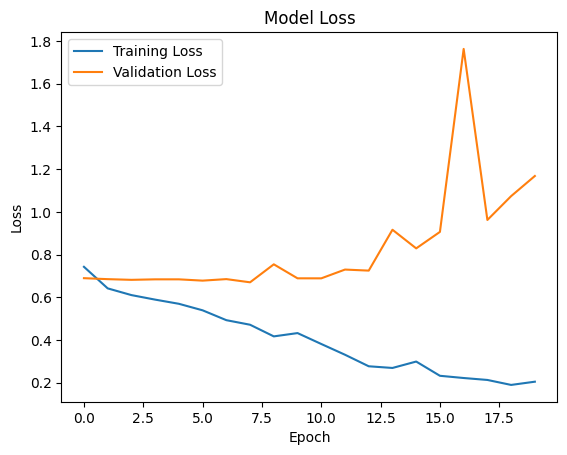%0A)

In \[ \]: